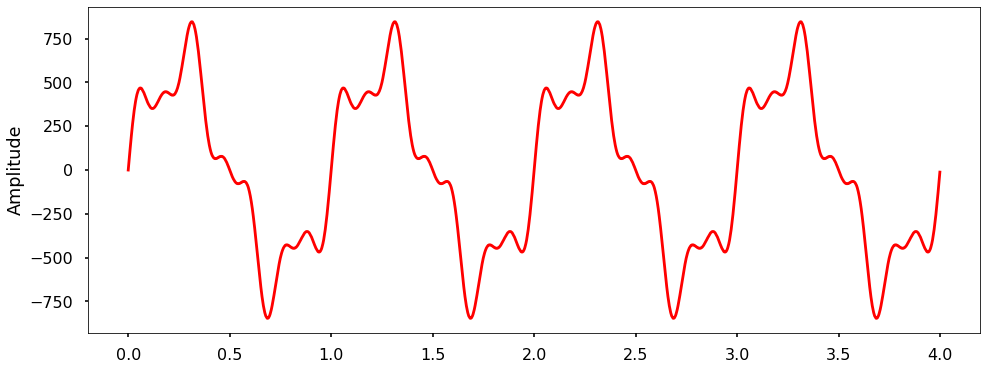

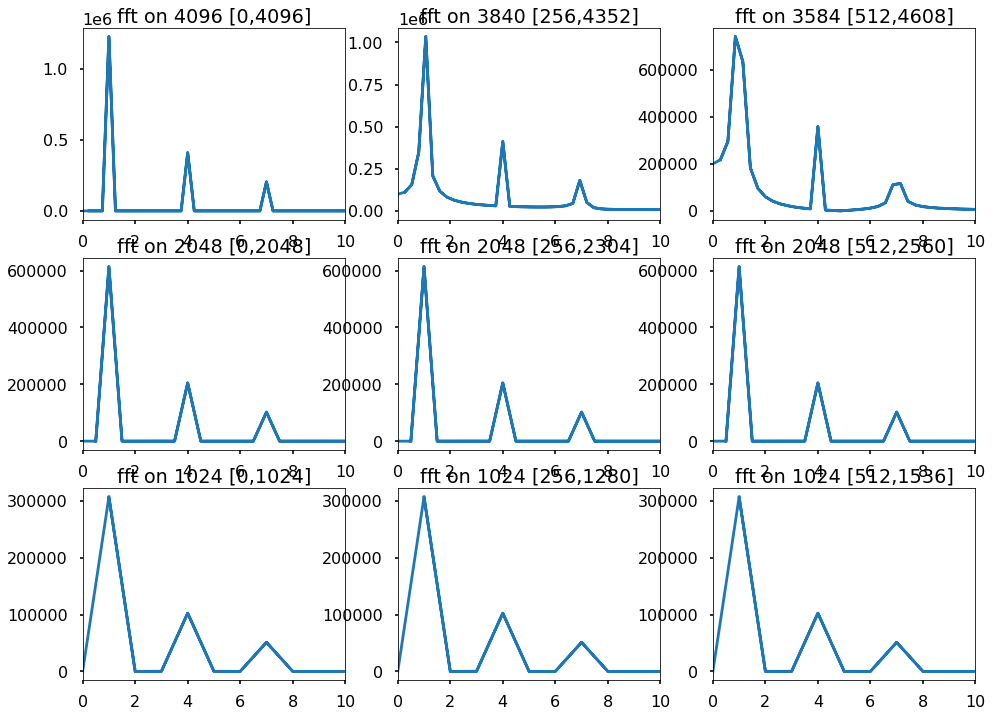

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(threshold=np.inf)

plt.style.use('seaborn-poster')
%matplotlib inline

# sampling rate
sr = 4096
# sampling interval
ts = 4.0/sr
t = np.arange(0,4,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)
x *= 200;
#print(x)

x_int = x.astype(int)
# print(*x_int, sep = ", ")

cols = 3
rows = 3
depth = 2

skip = 256

# python way
arr = [[[0]*depth for _ in range(rows)] for _ in range(cols)]
# print(arr)
# numpy way
# arr = np.empty((cols, rows, depth))

for i in range(cols):
    for j in range(rows):
        arr[i][j] = x_int[slice(int(j*skip), int((sr/(pow(2, i))) + (j*skip)) )]
# print(arr)

plt.figure(figsize = (16, 6))
plt.plot(t, x_int, 'r')
plt.ylabel('Amplitude')
# num = len(x_int)

# Working with one subplot
#wave fft:
# fft_sin = np.fft.fft(x_int) 
# fft_freq_axis=np.fft.fftfreq(num,d=1/sr)
# ax1 = fig.add_subplot(212)
# ax1.plot(fft_freq_axis, abs(fft_sin))
# ax1.set_xlim(-50,50)

fig, axes = plt.subplots(cols, rows, figsize=(16,12))

for i in range(cols):
    for j in range(rows):
        num = len(arr[i][j])
        freq_axis = np.fft.fftfreq(num,d=1/(sr/4))
        freq = np.fft.fft(arr[i][j])
        axes[i][j].plot(abs(freq_axis), abs(freq))
        axes[i][j].set_xlim(0,10)
        axes[i][j].title.set_text(f'fft on {num} [{int(j*skip)},{int((sr/(pow(2, i))) + (j*skip))}]')

plt.show()